# Projek Akhir Kecerdasan Buatan | Kelompok 2 - A2
## Klasifikasi Pizza or Not Pizza
### Nama:
#### - Agditha Evalyn Lolongan (2109106030) 
#### - Ibnu Yafi Arya Wardana (2109106039)
#### - Novia Indah Ramadhani (2109106041)
### Link Dataset : https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza

## Import Library

In [36]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os # Buat perintah seperti di cmd
import shutil # Buat copas 
import random
import tensorflow_datasets as tfds

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# [1] Data Collecting

### Penyimpanan address
Menyimpan address dari dataset pada suatu variabel untuk menghindari penulisan  
berulang agar memudahkan pembacaan dan pembuatan program

In [37]:
#root_path = r'C:\Users\ASUS\venv_A2-21\Novia_041\PA_KB_LAGI\files'
#source_path = r'C:\Users\ASUS\venv_A2-21\Novia_041\PA_KB_LAGI\files\pizza_not_pizza'

root_path = r'D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\PA_KB'
source_path = r'D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\PA_KB\pizza_not_pizza'

# root_path = r'C:\Users\MSi-GAMING\PA_KB'
# source_path = r'C:\Users\MSi-GAMING\PA_KB\pizza_not_pizza'

destination = os.path.join(root_path, 'data_used')

### Jumlah Data
Menampilkan banyaknya data di dalam folder dataset  
untuk masing-masing folder / label di dalamnya

In [38]:
# Cek jumlah data pada folder
folders = {}

for folder in os.listdir(source_path):
    folders[folder] = len(os.listdir(os.path.join(source_path, folder)))
    
print(f'Total Images: {folders}')

Total Images: {'not_pizza': 100, 'pizza': 1}


# [2] Data Preprocessing

## Data Spliting

### Pembuatan Folder untuk menyimpan hasil splitting
Folder nantinya akan diisi dengan data hasil split baik train maupun validation.

In [39]:
# Buat folder baru
# Cek terlebih dahulu apakah sudah ada atau belum.
if os.path.isdir(os.path.join(destination, 'training')):
    print(f"path {os.path.join(destination, 'training')} sudah ada")
    
else:
    os.makedirs(os.path.join(destination, 'training'))
    for kelas in folders.keys():
        os.makedirs(os.path.join(destination, f'training/{kelas}'))
            
            
            
if os.path.isdir(os.path.join(destination, 'validation')):
    print(f"path {os.path.join(destination, 'validation')} sudah ada")
    
else:
    os.makedirs(os.path.join(destination, 'validation'))
    for kelas in folders.keys():
        os.makedirs(os.path.join(destination, f'validation/{kelas}'))

path D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\PA_KB\data_used\training sudah ada
path D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\PA_KB\data_used\validation sudah ada


### Simpan nama data ke List
Memasukkan nama data ke list dan mengabaikan data corrupt.

In [40]:
files_pizza = []
files_not_pizza = []

#Cek data corrupt yg uk = 0
for file in os.listdir(os.path.join(source_path, "Pizza")):
    if os.path.getsize(os.path.join(source_path, f'Pizza/{file}')):
        files_pizza.append(file)
    else:
        print(f'{file} dilewati')
        

        
for file in os.listdir(os.path.join(source_path, "Not_Pizza")):
    if os.path.getsize(os.path.join(source_path, f'Not_Pizza/{file}')):
        files_not_pizza.append(file)
    else:
        print(f'{file} dilewati')

### Merasiokan Data Split
Data pada list diacak, lalu dibagi
dengan rasio perbandingan yang diinginkan.

In [41]:
files_pizza = random.sample(files_pizza, len(files_pizza))
files_not_pizza = random.sample(files_not_pizza, len(files_not_pizza))

split = 0.2

def bagi(listnya, potongnya):
    return int(-len(listnya) * potongnya)


# Cara bagi
files_pizza_training = files_pizza[:bagi(files_pizza, split)]
files_not_pizza_training = files_not_pizza[:bagi(files_not_pizza, split)]
files_pizza_validation = files_pizza[bagi(files_pizza, split):]
files_not_pizza_validation = files_not_pizza[bagi(files_not_pizza, split):]

In [42]:
for file in files_pizza_training:
    shutil.copyfile(
    os.path.join(source_path, f'pizza/{file}'),
        os.path.join(destination, f'training/pizza/{file}')
    )
    
for file in files_not_pizza_training:
    shutil.copyfile(
    os.path.join(source_path, f'not_pizza/{file}'),
        os.path.join(destination, f'training/not_pizza/{file}')
    )

for file in files_pizza_validation:
    shutil.copyfile(
    os.path.join(source_path, f'pizza/{file}'),
        os.path.join(destination, f'validation/pizza/{file}')
    )
    
for file in files_not_pizza_validation:
    shutil.copyfile(
    os.path.join(source_path, f'not_pizza/{file}'),
        os.path.join(destination, f'validation/not_pizza/{file}')
    )

In [43]:
train_path = os.path.join(destination, 'training')
val_path = os.path.join(destination, 'validation')

### Proses Augmentasi 
- Rescale
- Horizontal Flip
- Brightness 
- Fill mode 'nearest' : Nearest: nilai piksel terdekat dari wilayah yang tidak memiliki nilai dipilih dan diulang. Misalnya, aaaaaaaa | abcd | dddddddd.

In [44]:
# AUGMENTASI
# Initialisasi menggunakan Image Data Generator
dgen = ImageDataGenerator(
    rescale = 1./255,    #Normalisasi -> Nilai 1/255 artinya setiap nilai akan dikali 1/255 sehingga nilainya akan berubah menjadi antara 0 dan 1
    horizontal_flip = True, #Karena pizza bentuknya ada yang segitiga, bulat(?)
    brightness_range=[1.0, 1.2], 
    fill_mode = 'nearest'
)

# Load Data
targetSize = (120, 120) #Resize


# Training
print("TRAINING")
ds_train = dgen.flow_from_directory(
    train_path,
    target_size = targetSize,
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode='binary',
)

print(" Dengan Shape:", ds_train[0][0].shape)

# Validation
print("\nVALIDATION")
ds_val = dgen.flow_from_directory(
    val_path,
    target_size = targetSize,
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode='binary'
)

print("-- Dengan Shape:", ds_val[0][0].shape)

TRAINING
Found 1483 images belonging to 2 classes.
 Dengan Shape: (16, 120, 120, 3)

VALIDATION
Found 379 images belonging to 2 classes.
-- Dengan Shape: (16, 120, 120, 3)


In [45]:

img_generator = dgen.flow_from_directory(
    source_path,
    target_size = (120, 120),   #Uk Gambar
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode = 'binary',
    save_to_dir = 'Augmented',
    save_format = 'jpg'
)

Found 101 images belonging to 2 classes.


In [46]:
class_names=['not_pizza', 'pizza']

###### plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i+1)
    img, label = ds_train.next()
    plt.imshow(img[0])
    plt.axis("off")
    plt.title(class_names[int(label[0])])
plt.xlabel(" Data Training")
plt.show()

i=1
plt.figure(figsize=(12,7))
for images, labels in ds_train:
    
    id = np.random.randint(len(images))
    image, label = images[id], int(labels[id])
    
    plt.subplot(3,4,i)
    plt.imshow(image)
    plt.title(f"Class : {class_names[label]}")
    plt.axis('off')
    
    i+=1
    if i>=13:
        break

plt.show()
plt.tight_layout()

# [3] Data Analysis & Visualisasi

In [47]:
if os.path.isdir(os.path.join(root_path, 'Augmented')):
    pass
else:
    os.makedirs(os.path.join(root_path, 'Augmented'))

### Visualisasi Setelah Augmentasi

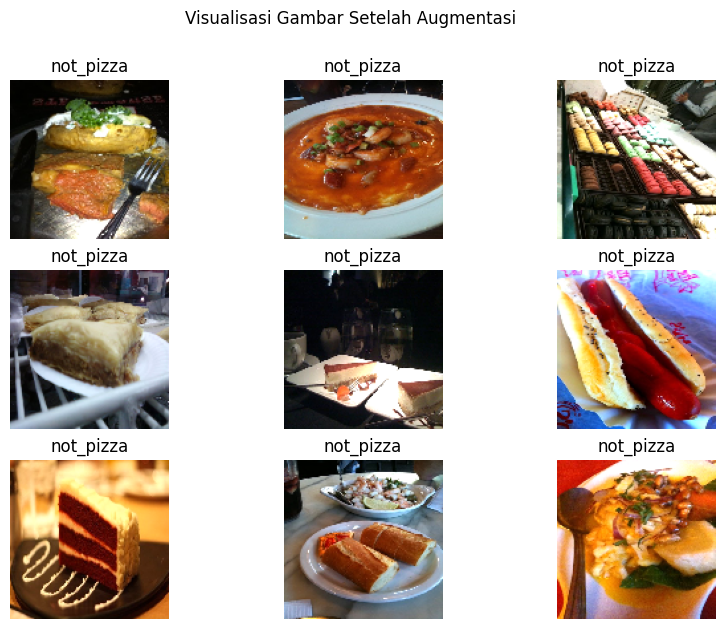

In [48]:
plt.figure(figsize=(10,7))
plt.suptitle('Visualisasi Gambar Setelah Augmentasi')

for i in range(9):
    plt.subplot(3, 3, i+1)
    img, label = img_generator.next()
    plt.imshow(img[0])
    plt.axis("off")
    plt.title(class_names[int(label[0])])
    
plt.xlabel(" Data Training")
plt.show()

### Metadata (Informasi)

In [49]:
print ("================== METADATA ==================")

# Membuat Table Hasil dari Akurasi dan Loss Train & Val
from prettytable import PrettyTable

evaluasi_train = model.evaluate(ds_train, verbose=0)
evaluasi_val = model.evaluate(ds_val, verbose=0)

table1 = PrettyTable(["Atribut", "Isi"])
table1.align = "l"

table1.add_row(["Nama Dataset", "Pizza or Not Pizza"])
table1.add_row(["Kelas", class_names])
table1.add_row(["Ukuran", class_names])
# table1.add_row(["Jumlah Data", {folders}])
table1.add_row(["Jumlah Data Train", class_names])
table1.add_row(["Jumlah Data Validation", class_names])
table1.add_row(["Kelas", class_names])

print(table1)

================== METADATA ==================


NameError: name 'model' is not defined

# [4] Data Modelling

In [50]:
# Import Library yang digunakan

from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

### Penjelasan
#### [1] Input Layer
- Menggunakan Convolution 2D
- Fungsi aktivasi relu
- Input shape 120,120,3

#### [2] Hidden Layer
- Melakukan proses pooling sebanyak 4 kali dengan matriks 2x2 (Pooling adalah proses mengurangi ukuran/resolusi pada gambar akan tetapi tetap mempertahankan informasi penting pada gambar tersebut.)
- Layer Flatten (Proses flattening. Data pooling dimiliki berupa array 2 dimensi, kemudian dikonversi menjadi data satu dimensi single vector.)
- Layer Dense 256 

#### [3] Output Layer
- Layer Dense 1 filter dengan aktivasi sigmoid -> Hanya berupa satu node karena klasifikasi ini termasuk dalam binary classification.

In [51]:
model = Sequential()

#INPUT LAYER
model.add(Conv2D(256, 3, 
            activation='relu',
            input_shape = [120,120,3]))

#HIDDEN LAYER
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0

### Compile Model
- Parameter optimisasi menggunakan metode adam
- Parameter loss untuk menentukan loss function menggunakan metode Binary Crossentropy
- Parameter metrics untuk menentukan performa metric berdasarkan accuracy

In [53]:
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

### Proses Melatih Model
- Menggunakan 15 iterasi
- Mengambil data validasi

In [54]:
hasil = model.fit(ds_train,batch_size=16, epochs=15, validation_data=ds_val)

Epoch 1/15
93/93 [==============================] - 168s 2s/step - loss: 0.6836 - accuracy: 0.5630 - val_loss: 0.6359 - val_accuracy: 0.6332
Epoch 2/15
93/93 [==============================] - 158s 2s/step - loss: 0.6826 - accuracy: 0.5826 - val_loss: 0.6776 - val_accuracy: 0.6332
Epoch 3/15
93/93 [==============================] - 163s 2s/step - loss: 0.6278 - accuracy: 0.6534 - val_loss: 0.6443 - val_accuracy: 0.6807
Epoch 4/15
93/93 [==============================] - 157s 2s/step - loss: 0.5817 - accuracy: 0.7033 - val_loss: 0.5438 - val_accuracy: 0.7230
Epoch 5/15
93/93 [==============================] - 150s 2s/step - loss: 0.5787 - accuracy: 0.7053 - val_loss: 0.5256 - val_accuracy: 0.7335
Epoch 6/15
93/93 [==============================] - 147s 2s/step - loss: 0.5439 - accuracy: 0.7310 - val_loss: 0.5564 - val_accuracy: 0.7652
Epoch 7/15
93/93 [==============================] - 153s 2s/step - loss: 0.5118 - accuracy: 0.7593 - val_loss: 0.4961 - val_accuracy: 0.7625
Epoch 8/15
93

# [5] Evaluasi

In [55]:
# Membuat Table Hasil dari Akurasi dan Loss Train & Val
from prettytable import PrettyTable

evaluasi_train = model.evaluate(ds_train, verbose=0)
evaluasi_val = model.evaluate(ds_val, verbose=0)

table = PrettyTable(["ATRIBUT", "TRAINING", "VALIDATION"])
table.align = "l"

table.add_row(["AKURASI", evaluasi_train[1], evaluasi_val[1]])
table.add_row(["LOSS", evaluasi_train[0], evaluasi_val[0]])

print(table)

+---------+---------------------+--------------------+
| ATRIBUT | TRAINING            | VALIDATION         |
+---------+---------------------+--------------------+
| AKURASI | 0.8604180812835693  | 0.7889181971549988 |
| LOSS    | 0.32857635617256165 | 0.5165825486183167 |
+---------+---------------------+--------------------+


In [56]:
model.save(',model/model_finished')
model.save(',model/model_finished.h5')

INFO:tensorflow:Assets written to: ,model/model_finished\assets


INFO:tensorflow:Assets written to: ,model/model_finished\assets


### Visualisasi 

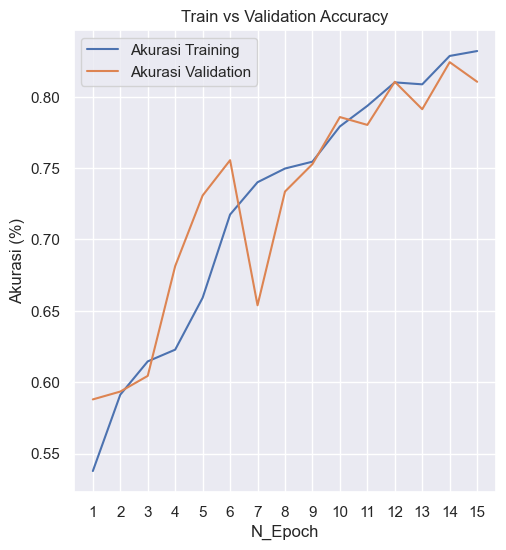

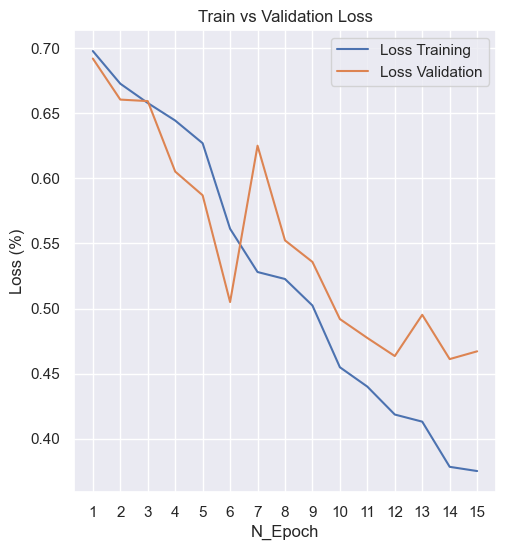

In [ ]:

import seaborn as sns

epochs = [i+1 for i in range(15)]

sns.set_theme()

plt.figure(figsize=(12,6))

#--------------------------------Subplot Akurasi--------------------------------
plt.subplot(1,2,1)
sns.lineplot(
    x=epochs, 
    y=hasil.history['accuracy'], 
    label= 'Akurasi Training'
)
sns.lineplot(
    x=epochs, 
    y=hasil.history['val_accuracy'], 
    label= 'Akurasi Validation'
)

plt.xticks(epochs)
plt.ylabel('Akurasi (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Validation Accuracy')

plt.show()


#--------------------------------Subplot Loss--------------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.lineplot(
    x=epochs, 
    y=hasil.history['loss'], 
    label= 'Loss Training'
)
sns.lineplot(
    x=epochs, 
    y=hasil.history['val_loss'], 
    label= 'Loss Validation'
)

plt.xticks(epochs)
plt.ylabel('Loss (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Validation Loss')

plt.show()

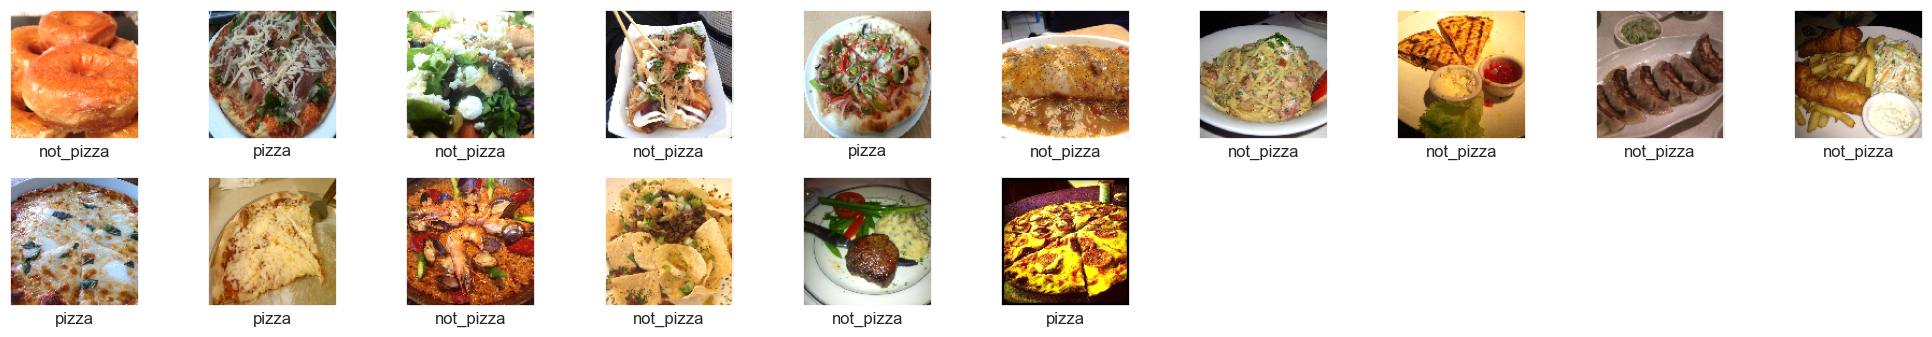

In [ ]:
# Display some images and their corresponding labels
imgs, labels = next(ds_train)
i=0
plt.figure(figsize=(20,5))
for img,label in zip(imgs,labels):
    plt.subplot(3,10,i+1)
    plt.imshow(img)
    plt.xlabel(class_names[label.astype('int32')])
    plt.xticks([])
    plt.yticks([])
    i+=1
    if i==30:
        break
plt.tight_layout()
plt.show()

## Prediksi Gambar

In [ ]:
prediction = model.predict(ds_val)

23/23 [==============================] - 12s 509ms/step


In [ ]:
image ,label = next(iter(ds_train))

plt.figure(figsize=(15,10))
plt.suptitle('Visualisasi Prediksi Gambar')

for i in range(9) :

    actual_label = class_names[np.argmax(label[i])]
    predict_label = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'Label Aktual: {actual_label}\n Label Prediksi : {class_names[predict_label]}')

NameError: name 'ds_train' is not defined

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 16))
cm = confusion_matrix(ds_train, ds_val)

sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=class_names[0],
            yticklabels=class_names[1], 
            cmap = "Purples"
           )
plt.title("Confusion Matrix")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [92, 23]

<Figure size 2000x1600 with 0 Axes>

## Prediksi Dengan Cara Upload

In [ ]:
from PIL import Image
import numpy as np

OSError: Unable to open file (file signature not found)

In [ ]:

def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
im = image.load_model('buku1.jpg')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)
print( labels[np.argmax(y)], np.max(y) )

AttributeError: module 'keras.api._v2.keras.preprocessing.image' has no attribute 'load_model'